# SQL con Python
http://pandas.pydata.org/pandas-docs/stable/merging.html

In [18]:
# pip install pandasql
from pandasql import sqldf
from pandasql import load_meat, load_births
import matplotlib.pyplot as plt
from pandasql import *
import pandas as pd

In [17]:
# DATA:
meat = load_meat()
births = load_births()

In [40]:
# EXPLORE:
print(type(meat), len(meat))
print(type(births), len(births))

<class 'pandas.core.frame.DataFrame'> 827
<class 'pandas.core.frame.DataFrame'> 408


In [41]:
print(meat.head(10))
print(births.head(10))

        date   beef   veal    pork  lamb_and_mutton  broilers  other_chicken  \
0 1944-01-01  751.0   85.0  1280.0             89.0       NaN            NaN   
1 1944-02-01  713.0   77.0  1169.0             72.0       NaN            NaN   
2 1944-03-01  741.0   90.0  1128.0             75.0       NaN            NaN   
3 1944-04-01  650.0   89.0   978.0             66.0       NaN            NaN   
4 1944-05-01  681.0  106.0  1029.0             78.0       NaN            NaN   
5 1944-06-01  658.0  125.0   962.0             79.0       NaN            NaN   
6 1944-07-01  662.0  142.0   796.0             82.0       NaN            NaN   
7 1944-08-01  787.0  175.0   748.0             87.0       NaN            NaN   
8 1944-09-01  774.0  182.0   678.0             91.0       NaN            NaN   
9 1944-10-01  834.0  215.0   777.0            100.0       NaN            NaN   

   turkey  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  
5     NaN  
6     NaN  
7     NaN  
8     NaN  

In [53]:
#print(meat.describe())
#print(births.describe())

In [ ]:
# SQL PySQLFUNCTION:
pysqldf = lambda q: sqldf(q, globals())

In [62]:
#EXPLORING USING SQL:
q1 = """
SELECT *
FROM meat
LIMIT 10;"""

qmeat = sqldf(q1, locals())
qmeat

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01 00:00:00.000000,751.0,85.0,1280.0,89.0,None,None,None
1,1944-02-01 00:00:00.000000,713.0,77.0,1169.0,72.0,None,None,None
2,1944-03-01 00:00:00.000000,741.0,90.0,1128.0,75.0,None,None,None
3,1944-04-01 00:00:00.000000,650.0,89.0,978.0,66.0,None,None,None
4,1944-05-01 00:00:00.000000,681.0,106.0,1029.0,78.0,None,None,None
5,1944-06-01 00:00:00.000000,658.0,125.0,962.0,79.0,None,None,None
6,1944-07-01 00:00:00.000000,662.0,142.0,796.0,82.0,None,None,None
7,1944-08-01 00:00:00.000000,787.0,175.0,748.0,87.0,None,None,None
8,1944-09-01 00:00:00.000000,774.0,182.0,678.0,91.0,None,None,None
9,1944-10-01 00:00:00.000000,834.0,215.0,777.0,100.0,None,None,None


In [63]:
q2 = """
SELECT *
FROM births
LIMIT 10;"""

qbirths = sqldf(q2, locals())
qbirths

,date,births
0,1975-01-01 00:00:00.000000,265775
1,1975-02-01 00:00:00.000000,241045
2,1975-03-01 00:00:00.000000,268849
3,1975-04-01 00:00:00.000000,247455
4,1975-05-01 00:00:00.000000,254545
5,1975-06-01 00:00:00.000000,254096
6,1975-07-01 00:00:00.000000,275163
7,1975-08-01 00:00:00.000000,281300
8,1975-09-01 00:00:00.000000,270738
9,1975-10-01 00:00:00.000000,265494


In [66]:
# SQL JOING QUERY:
jq = """
SELECT
	m.date, 
	m.beef, 
	b.births
FROM meat m
LEFT JOIN births b
ON m.date = b.date
WHERE
m.date > '1974-12-31';
"""

In [67]:
# EXECUTE DE QUERY:
df = pysqldf(jq)
df

,date,beef,births
0,1975-01-01 00:00:00.000000,2106.0,265775.0
1,1975-02-01 00:00:00.000000,1845.0,241045.0
2,1975-03-01 00:00:00.000000,1891.0,268849.0
3,1975-04-01 00:00:00.000000,1895.0,247455.0
4,1975-05-01 00:00:00.000000,1849.0,254545.0
...,...,...,...
558,2012-07-01 00:00:00.000000,2200.8,368450.0
559,2012-08-01 00:00:00.000000,2367.5,359554.0
560,2012-09-01 00:00:00.000000,2016.0,361922.0
561,2012-10-01 00:00:00.000000,2343.7,347625.0


In [68]:
df.births = df.births.fillna(method='backfill')
df.births

0      265775.0
1      241045.0
2      268849.0
3      247455.0
4      254545.0
         ...   
558    368450.0
559    359554.0
560    361922.0
561    347625.0
562    320195.0
Name: births, Length: 563, dtype: float64

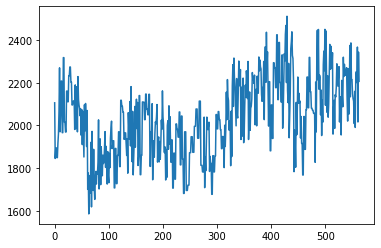

In [37]:
plt.plot(df['beef'])

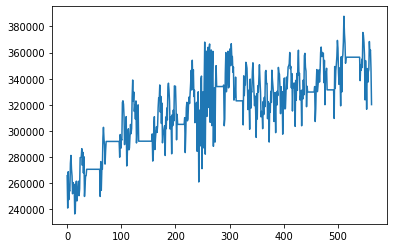

In [36]:
plt.plot(df['births'])

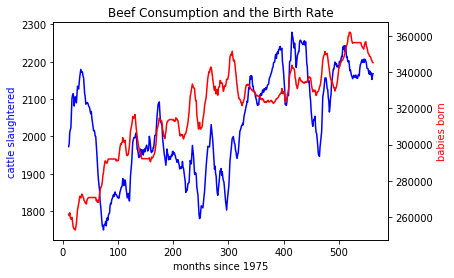

In [71]:
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(df['beef'].rolling(12).mean(), color='b')
ax1.set_xlabel('months since 1975')
ax1.set_ylabel('cattle slaughtered', color='b')

ax2 = ax1.twinx()
ax2.plot(df['births'].rolling(12).mean(), color='r')
ax2.set_ylabel('babies born', color='r')

plt.title("Beef Consumption and the Birth Rate")
plt.show()

In [73]:
# AGGREGATION:
# pandasql supports aggregation. You can use aliased column names or column numbers in your group by clause.

# births per year
q3 = """
SELECT
strftime("%Y", date), 
SUM(births)
FROM births
GROUP BY 1
ORDER BY 1;
"""

print(sqldf(q3, locals()))


   strftime("%Y", date)  SUM(births)
0                  1975      3136965
1                  1976      6304156
2                  1979      3333279
3                  1982      3612258
4                  1983      7333238
5                  1986      7308074
6                  1987      3760561
7                  1988      3756547
8                  1990      7718904
9                  1991     11714356
10                 1993      8194907
11                 1995      4000240
12                 1996      3952767
13                 1997      3899589
14                 1998      3891494
15                 1999      3880894
16                 2000      3941553
17                 2001      8018231
18                 2002      4025933
19                 2003      4021726
20                 2005      8210950
21                 2007      4138349
22                 2008      4265555
23                 2011      4247694
24                 2012      4130665


In [76]:
# **locals() vs. globals()**. pandasql needs to have access to other variables in your session/environment. 
# You can pass locals() to pandasql when executing a SQL statement, but if you're running a lot of queries
# ..that might be a pain. To avoid passing locals all the time, you can add this helper function to your 
# ..script to set globals() like so:

def pysqldf(q):
    return sqldf(q, globals())

q = """
SELECT *
FROM
births
LIMIT 10;"""

print(pysqldf(q))

                         date  births
0  1975-01-01 00:00:00.000000  265775
1  1975-02-01 00:00:00.000000  241045
2  1975-03-01 00:00:00.000000  268849
3  1975-04-01 00:00:00.000000  247455
4  1975-05-01 00:00:00.000000  254545
5  1975-06-01 00:00:00.000000  254096
6  1975-07-01 00:00:00.000000  275163
7  1975-08-01 00:00:00.000000  281300
8  1975-09-01 00:00:00.000000  270738
9  1975-10-01 00:00:00.000000  265494


In [81]:
# JOINS: You can join dataframes using normal SQL syntax.

# joining meats + births on date

q = """
SELECT
    m.date, 
    b.births, 
    m.beef
FROM meat m
INNER JOIN births b ON m.date = b.date
ORDER BY m.date
LIMIT 100;
"""

joined = pysqldf(q)
print(joined.head())


                         date  births    beef
0  1975-01-01 00:00:00.000000  265775  2106.0
1  1975-02-01 00:00:00.000000  241045  1845.0
2  1975-03-01 00:00:00.000000  268849  1891.0
3  1975-04-01 00:00:00.000000  247455  1895.0
4  1975-05-01 00:00:00.000000  254545  1849.0


In [82]:
## WHERE conditions
# Here's a WHERE clause.

q = """
SELECT
date, beef, veal, pork, lamb_and_mutton
FROM meat
WHERE lamb_and_mutton >= veal
ORDER BY date DESC
LIMIT 10;
"""

print(pysqldf(q))


                         date    beef  veal    pork  lamb_and_mutton
0  2012-11-01 00:00:00.000000  2206.6  10.1  2078.7             12.4
1  2012-10-01 00:00:00.000000  2343.7  10.3  2210.4             14.2
2  2012-09-01 00:00:00.000000  2016.0   8.8  1911.0             12.5
3  2012-08-01 00:00:00.000000  2367.5  10.1  1997.9             14.2
4  2012-07-01 00:00:00.000000  2200.8   9.5  1721.8             12.5
5  2012-06-01 00:00:00.000000  2252.1   8.9  1750.4             12.4
6  2012-05-01 00:00:00.000000  2232.0  10.4  1926.8             13.6
7  2012-04-01 00:00:00.000000  1990.6   9.9  1841.7             12.9
8  2012-03-01 00:00:00.000000  2159.8  10.0  1987.9             14.2
9  2012-02-01 00:00:00.000000  2009.0   9.8  1882.9             12.3


In [84]:
# Since pandasql is powered by SQLite3, you can do most anything you can do in SQL. Here are some examples using common SQL features such as subqueries, order by, functions, and unions.

#################################################
# SQL FUNCTIONS
# e.g. `RANDOM()`
#################################################

q = """
SELECT *
FROM meat
ORDER BY RANDOM()
LIMIT 10;"""

print(pysqldf(q))


                         date    beef   veal    pork  lamb_and_mutton  \
0  1990-02-01 00:00:00.000000  1706.0   24.0  1213.0             29.0   
1  1992-12-01 00:00:00.000000  1855.0   26.0  1524.0             29.0   
2  1951-05-01 00:00:00.000000   716.0   71.0   798.0             34.0   
3  1946-03-01 00:00:00.000000   796.0   92.0   780.0             97.0   
4  1975-07-01 00:00:00.000000  1916.0   77.0   817.0             32.0   
5  1977-06-01 00:00:00.000000  2182.0   66.0  1022.0             29.0   
6  1992-09-01 00:00:00.000000  1996.0   23.0  1511.0             30.0   
7  1983-01-01 00:00:00.000000  1928.0   34.0  1159.0             30.0   
8  1994-06-01 00:00:00.000000  2156.0   24.0  1411.0             24.0   
9  1949-10-01 00:00:00.000000   772.0  120.0   764.0             56.0   

   broilers other_chicken  turkey  
0    1368.0          None   298.3  
1    1817.8          None   393.1  
2       NaN          None     NaN  
3       NaN          None     NaN  
4     714.2     

In [85]:
#################################################
# UNION ALL
#################################################

q = """
SELECT
date, 
'beef' AS meat_type, 
beef AS value
FROM meat

UNION ALL

SELECT
date, 
'veal' AS meat_type, 
veal AS value
FROM meat

UNION ALL

SELECT
date, 
'pork' AS meat_type, 
pork AS value
FROM meat

UNION ALL

SELECT
date, 
'lamb_and_mutton' AS meat_type, lamb_and_mutton AS value
FROM meat

ORDER BY 1
"""

print(pysqldf(q).head(20))


                          date        meat_type   value
0   1944-01-01 00:00:00.000000             beef   751.0
1   1944-01-01 00:00:00.000000             veal    85.0
2   1944-01-01 00:00:00.000000             pork  1280.0
3   1944-01-01 00:00:00.000000  lamb_and_mutton    89.0
4   1944-02-01 00:00:00.000000             beef   713.0
5   1944-02-01 00:00:00.000000             veal    77.0
6   1944-02-01 00:00:00.000000             pork  1169.0
7   1944-02-01 00:00:00.000000  lamb_and_mutton    72.0
8   1944-03-01 00:00:00.000000             beef   741.0
9   1944-03-01 00:00:00.000000             veal    90.0
10  1944-03-01 00:00:00.000000             pork  1128.0
11  1944-03-01 00:00:00.000000  lamb_and_mutton    75.0
12  1944-04-01 00:00:00.000000             beef   650.0
13  1944-04-01 00:00:00.000000             veal    89.0
14  1944-04-01 00:00:00.000000             pork   978.0
15  1944-04-01 00:00:00.000000  lamb_and_mutton    66.0
16  1944-05-01 00:00:00.000000             beef 

In [86]:
#################################################
# subqueries
# fancy!
#################################################

q = """
SELECT m1.date, m1.beef
FROM meat m1
WHERE m1.date IN

(SELECT date
FROM meat
WHERE beef >= broilers
ORDER BY date)
"""

more_beef_than_broilers = pysqldf(q)
print(more_beef_than_broilers.head(10))


                         date    beef
0  1960-01-01 00:00:00.000000  1196.0
1  1960-02-01 00:00:00.000000  1089.0
2  1960-03-01 00:00:00.000000  1201.0
3  1960-04-01 00:00:00.000000  1066.0
4  1960-05-01 00:00:00.000000  1202.0
5  1960-06-01 00:00:00.000000  1247.0
6  1960-07-01 00:00:00.000000  1166.0
7  1960-08-01 00:00:00.000000  1307.0
8  1960-09-01 00:00:00.000000  1298.0
9  1960-10-01 00:00:00.000000  1263.0
